# Data Loading

In [ ]:
#installing the Kaggle library
!pip install kaggle

In [ ]:
#Configuiring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#!/bin/bash
!kaggle datasets download andrewmvd/ocular-disease-recognition-odir5k

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
License(s): other
100% 1.62G/1.62G [01:20<00:00, 23.5MB/s]
100% 1.62G/1.62G [01:20<00:00, 21.7MB/s]


In [ ]:
#Extracting the ODIR-5K compressed dataset
from zipfile import ZipFile
dataset = '/content/ocular-disease-recognition-odir5k.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()

# Data Inspection

In [ ]:
import os
#Counting the number of images in train folder
path,dirs,files = next(os.walk('/content/ODIR-5K/ODIR-5K/Training Images'))
train_file_count = len(files)
print(f"There's {train_file_count} of files/images")

There's 7000 of files/images


In [ ]:
#Printing the name of the Images
train_file_names = os.listdir('/content/ODIR-5K/ODIR-5K/Training Images')
print(train_file_names)

['2568_right.jpg', '3423_left.jpg', '505_right.jpg', '3415_right.jpg', '861_right.jpg', '4219_left.jpg', '2194_left.jpg', '4069_left.jpg', '900_right.jpg', '680_right.jpg', '404_left.jpg', '4574_right.jpg', '3433_right.jpg', '3309_left.jpg', '4155_left.jpg', '1064_left.jpg', '335_right.jpg', '2550_right.jpg', '1523_right.jpg', '2636_left.jpg', '902_right.jpg', '1484_left.jpg', '3372_left.jpg', '4217_right.jpg', '2780_left.jpg', '253_left.jpg', '570_right.jpg', '278_left.jpg', '2796_left.jpg', '3098_left.jpg', '748_left.jpg', '3426_right.jpg', '3142_right.jpg', '2791_left.jpg', '2159_right.jpg', '3343_right.jpg', '2730_left.jpg', '1507_right.jpg', '557_left.jpg', '3992_left.jpg', '3314_left.jpg', '1265_right.jpg', '3353_right.jpg', '1309_right.jpg', '1396_left.jpg', '986_right.jpg', '4613_right.jpg', '506_left.jpg', '3141_right.jpg', '366_left.jpg', '4241_left.jpg', '272_right.jpg', '4311_left.jpg', '163_left.jpg', '1543_right.jpg', '3997_left.jpg', '2581_left.jpg', '2567_right.jpg', '1

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

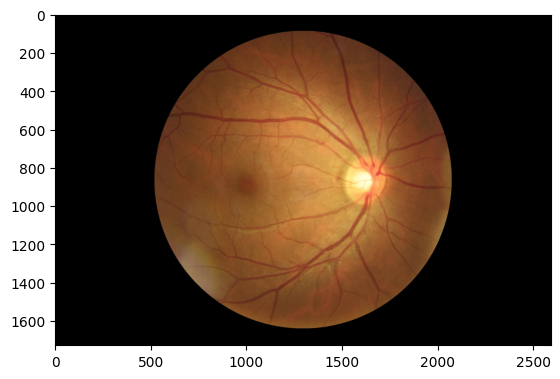

In [ ]:
#Display right eye image
right_train_img = mpimg.imread('/content/ODIR-5K/ODIR-5K/Training Images/4415_right.jpg')
plt.imshow(right_train_img)

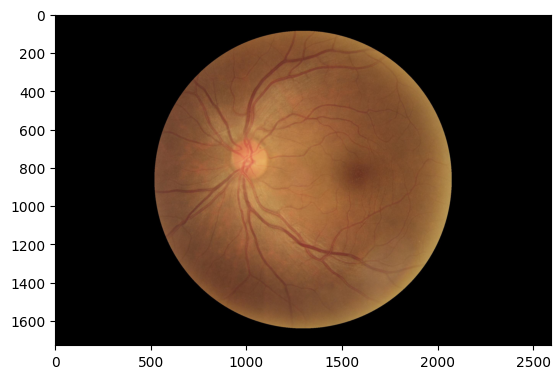

In [ ]:
#Display left eye image
right_train_img = mpimg.imread('/content/ODIR-5K/ODIR-5K/Training Images/4637_left.jpg')
plt.imshow(right_train_img)

In [ ]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [ ]:
#Load the DataSet
df = pd.read_csv('full_df.csv', na_values="?", skipinitialspace=True)

In [ ]:
print(df.shape)

(6392, 19)


In [ ]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
# Print the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [ ]:
# Print the first five rows of the dataset
df.head(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg


In [ ]:
# Print the column names
print(df.columns)

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')


In [ ]:
# Print the descriptive statistics of the numerical columns
print(df.describe())

                ID  Patient Age            N            D            G  \
count  6392.000000  6392.000000  6392.000000  6392.000000  6392.000000   
mean   2271.150814    57.857947     0.328692     0.332134     0.062109   
std    1417.559018    11.727737     0.469775     0.471016     0.241372   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%     920.750000    51.000000     0.000000     0.000000     0.000000   
50%    2419.500000    59.000000     0.000000     0.000000     0.000000   
75%    3294.000000    66.000000     1.000000     1.000000     0.000000   
max    4784.000000    91.000000     1.000000     1.000000     1.000000   

                 C            A            H            M            O  
count  6392.000000  6392.000000  6392.000000  6392.000000  6392.000000  
mean      0.062891     0.049906     0.031758     0.047872     0.248436  
std       0.242786     0.217768     0.175370     0.213513     0.432139  
min       0.000000     0.000000     0.000

In [ ]:
# Print the number of missing values in each column
print(df.isnull().sum())

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64


# Data Visualization

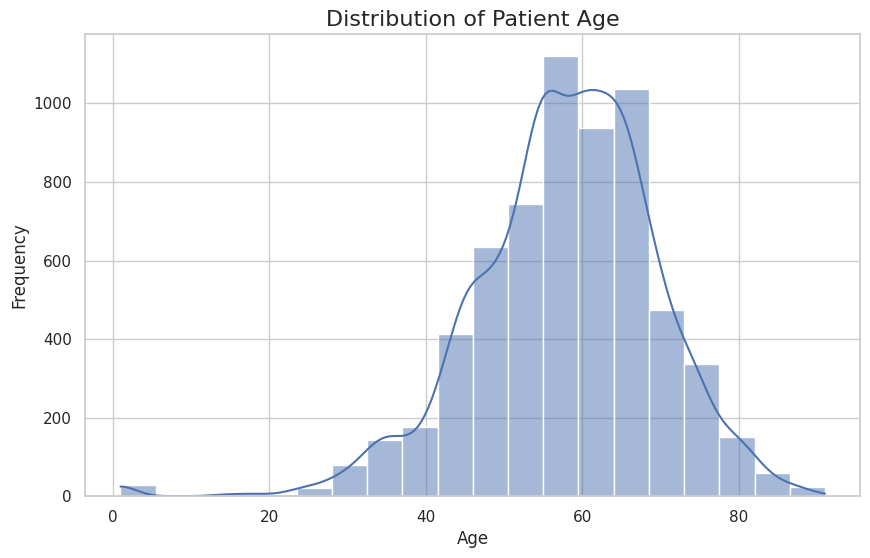

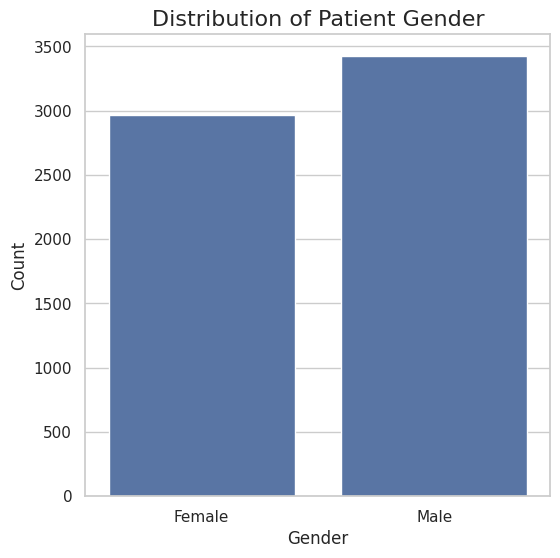

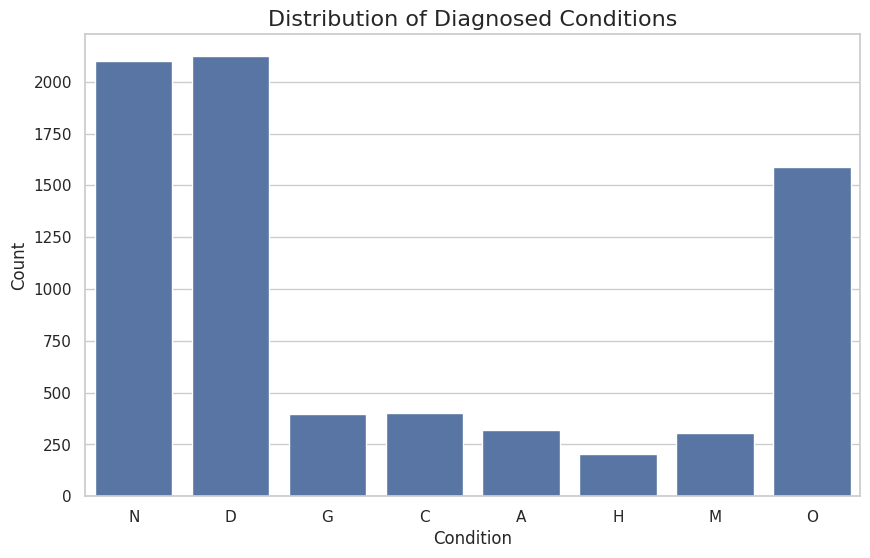

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Patient Age'], bins=20, kde=True)
plt.title('Distribution of Patient Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Patient Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Patient Sex', data=df)
plt.title('Distribution of Patient Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 3. Conditions Distribution (N, D, G, etc.)
conditions = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
condition_counts = df[conditions].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values)
plt.title('Distribution of Diagnosed Conditions', fontsize=16)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

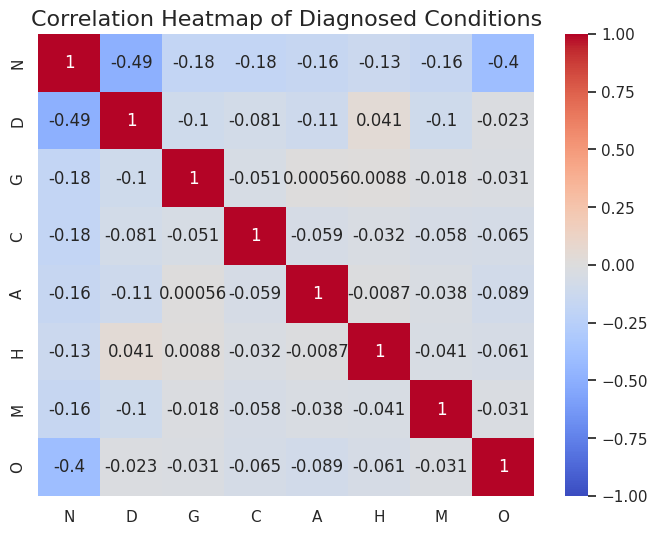

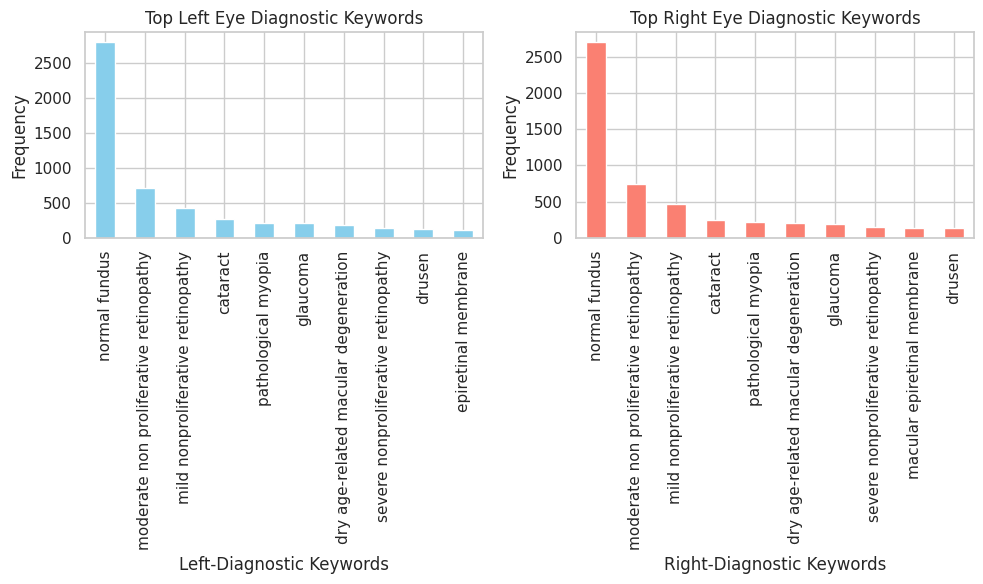

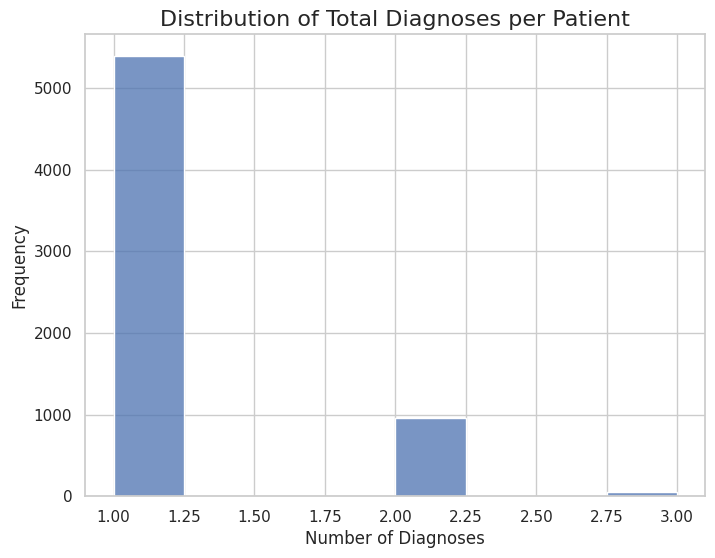

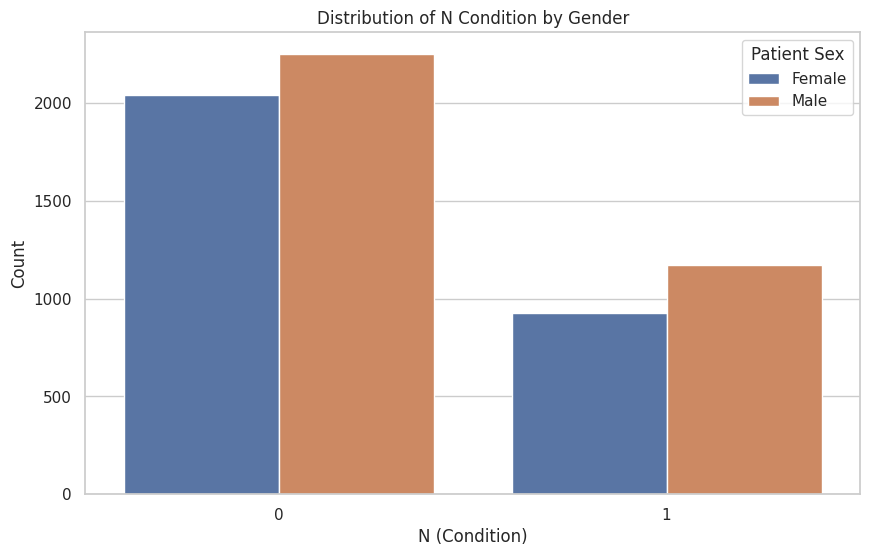

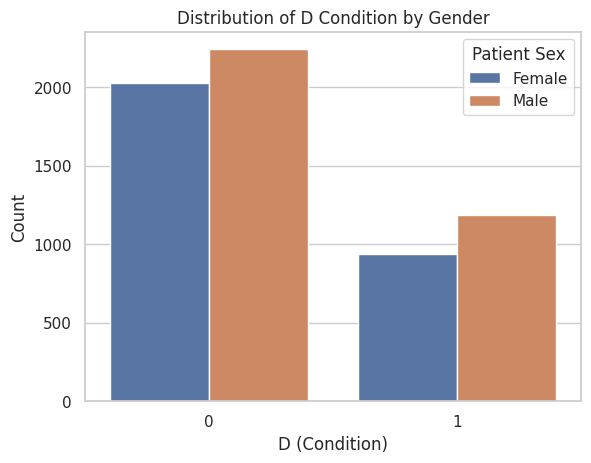

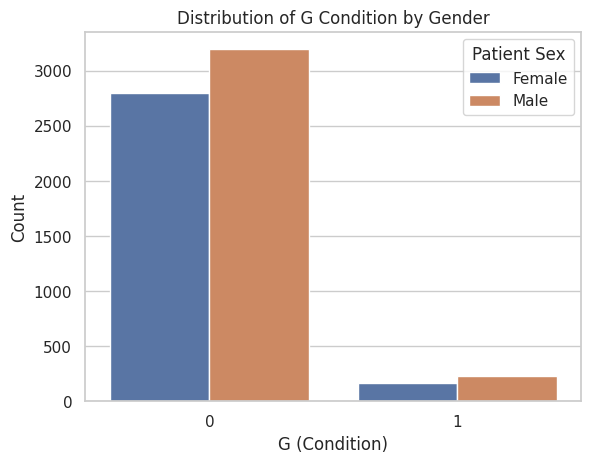

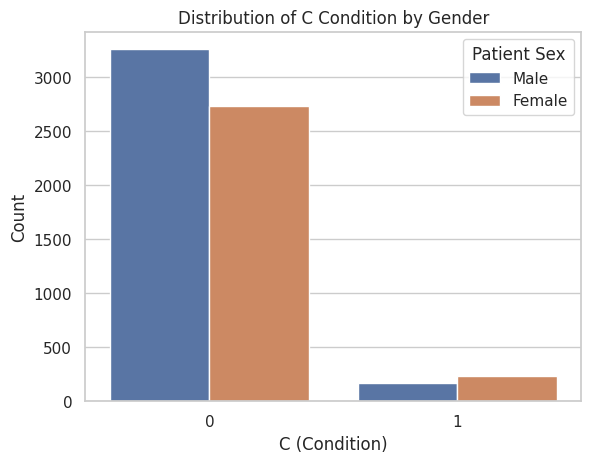

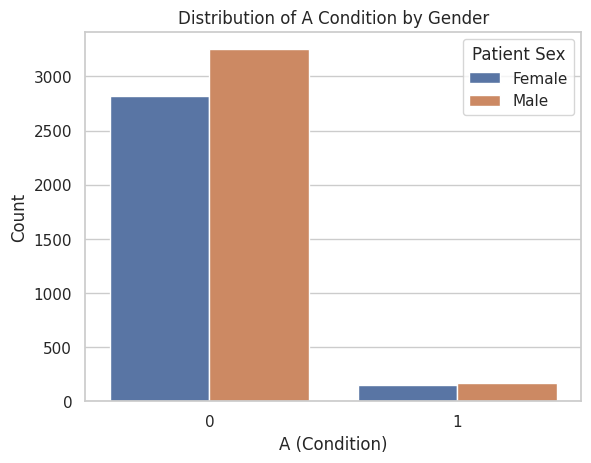

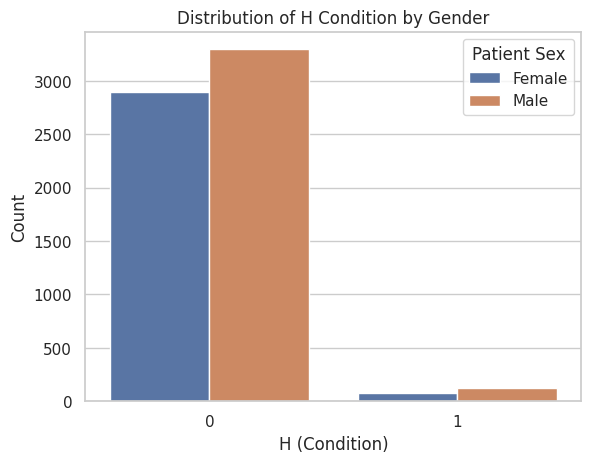

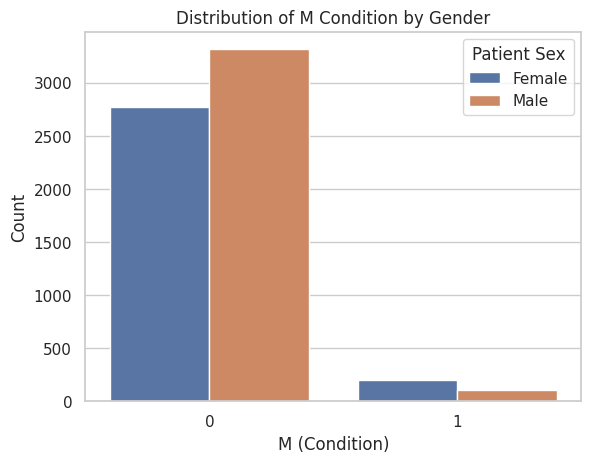

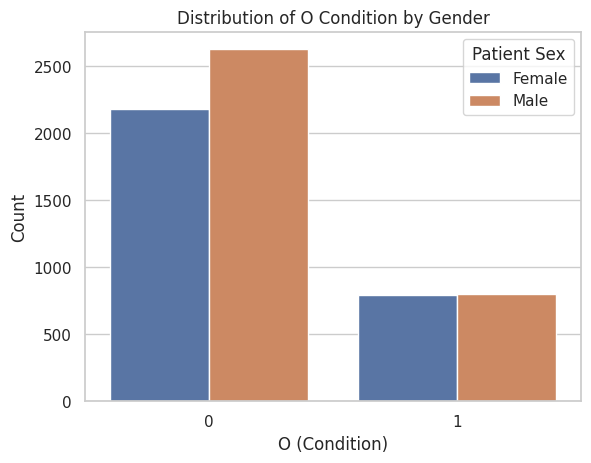

<ipython-input-19-c383ae14922b>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vs_conditions = df.groupby(age_bins)[['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']].sum()


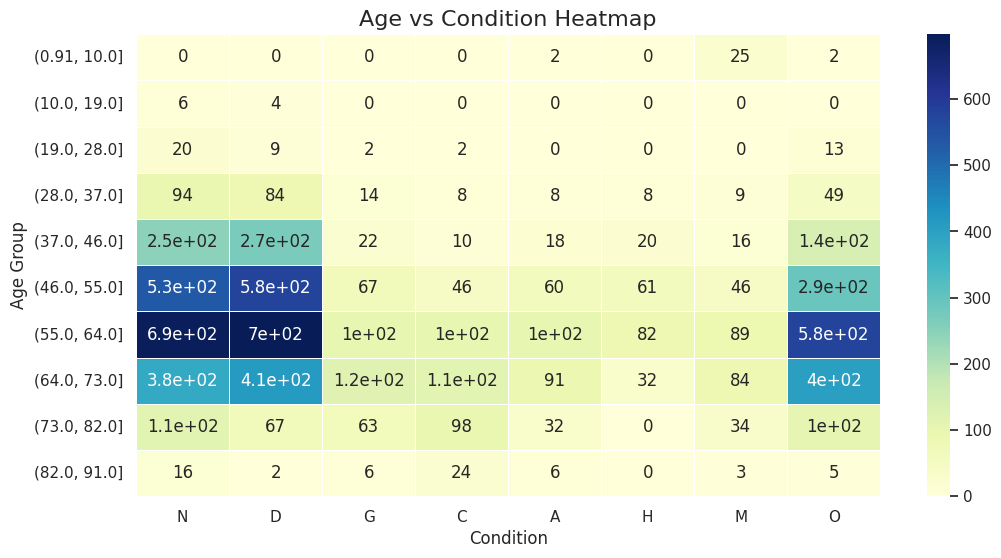

In [ ]:
# 1. Correlation Heatmap between conditions
plt.figure(figsize=(8, 6))
corr = df[['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Diagnosed Conditions', fontsize=16)
plt.show()

# 2. Diagnostic Keywords Frequency for Left and Right Eye
plt.figure(figsize=(10, 6))
left_keywords = df['Left-Diagnostic Keywords'].value_counts().head(10)
right_keywords = df['Right-Diagnostic Keywords'].value_counts().head(10)

plt.subplot(1, 2, 1)
left_keywords.plot(kind='bar', color='skyblue')
plt.title('Top Left Eye Diagnostic Keywords')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
right_keywords.plot(kind='bar', color='salmon')
plt.title('Top Right Eye Diagnostic Keywords')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Count of Diagnoses per Patient
df['Total Diagnoses'] = df[['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']].sum(axis=1)
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Diagnoses'], bins=8, kde=False)
plt.title('Distribution of Total Diagnoses per Patient', fontsize=16)
plt.xlabel('Number of Diagnoses')
plt.ylabel('Frequency')
plt.show()

# 4. Gender-wise Condition Distribution
plt.figure(figsize=(10, 6))
for condition in ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']:
    sns.countplot(x=condition, hue='Patient Sex', data=df)
    plt.title(f'Distribution of {condition} Condition by Gender')
    plt.xlabel(f'{condition} (Condition)')
    plt.ylabel('Count')
    plt.show()

# 5. Age vs Condition Heatmap
plt.figure(figsize=(12, 6))
age_bins = pd.cut(df['Patient Age'], bins=10)
age_vs_conditions = df.groupby(age_bins)[['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']].sum()

sns.heatmap(age_vs_conditions, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Age vs Condition Heatmap', fontsize=16)
plt.xlabel('Condition')
plt.ylabel('Age Group')
plt.show()